# Project 1 Sentiment Analysis

Questo progetto si propone di esplorare le potenzialità della Sentiment Analysis, una disciplina dell'analisi dei dati che si focalizza sull'interpretazione delle emozioni e delle opinioni espresse nei testi. La Sentiment Analysis consente di estrarre da dati testuali, come le recensioni di prodotti online, un indice numerico che riflette il grado di apprezzamento o insoddisfazione dell'utente che ha scritto la recensione. \
Per condurre questa analisi, è stato utilizzato un dataset disponibile su Kaggle, reperibile al seguente link: https://www.kaggle.com/datasets/ahmedabdulhamid/reviews-dataset \
Attraverso l'analisi di questo dataset, esploreremo le metodologie e le tecniche impiegate nella Sentiment Analysis e cercheremo di trarre insight utili per comprendere le opinioni degli utenti e migliorare i prodotti o servizi in questione.

## Caricamento dei dati

In [1]:
# questa cella di codice contiene tutti i pacchetti che saranno utilizzati nel Notebook

import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jacopo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jacopo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('project1reviews.csv')

In [4]:
df

,review
0,Fantastic spot for an even or a quite cocktail...
1,"Love, love, love the calamari. It's so good an..."
2,"Love this place. Stiff martinis and cocktails,..."
3,It's everything a great cocktail bar should be...
4,"I came here before a pirates game, so it was a..."
...,...
4316,My wife and I caught this show at the Golden N...
4317,This was the dumbest show we have ever seen. ...
4318,My girlfriend and I went to this show. It was ...
4319,The restrooms looked like after an bombardment...


A questo punto, il file è stato caricato correttamente, si vuole sottolineare come all'inizio siamo in possesso soltanto dell'elenco delle recensioni, non ci è stata fornita nessun'altra infomrazione. I dati, in questo caso, sono recensioni di vari prodotti o servizi in lingua inglese, ma le stesse tecniche possono essere utilizzate per dati testuali in italiano.

## 1. Preprocessing

In questa fase, i dati testuali vengono processati, in modo da poter essere analizzati successivamente e poter essere sottoposti ad algoritmi di Machine Learning. \
In particolare, le tecniche implementate sono:
- Tokenizzazione: il testo viene suddiviso in unità più piccole, generalmente parole o frasi, chiamate token
- Rimozione delle stopwords: le stopwords sono parole comuni che spesso non aggiungono significato alla frase, come articoli, preposizioni e congiunzioni. Rimuovendo queste parole, è possibile concentrarsi sulle parole chiave e migliorare l'efficacia dell'analisi del sentimento.

In [5]:
stop_words = set(stopwords.words('english'))

def preprocessing(text):
    token = word_tokenize(text)
    clean = [x for x in token if x.lower() not in stop_words and x not in string.punctuation]
    return clean

df['review'] = df['review'].apply(preprocessing)
df

,review
0,"[Fantastic, spot, even, quite, cocktail, swell..."
1,"[Love, love, love, calamari, 's, good, spicy, ..."
2,"[Love, place, Stiff, martinis, cocktails, chea..."
3,"['s, everything, great, cocktail, bar, Great, ..."
4,"[came, pirates, game, around, 5:30ish, evening..."
...,...
4316,"[wife, caught, show, Golden, Nugget, heard, go..."
4317,"[dumbest, show, ever, seen, never, laughed, 15..."
4318,"[girlfriend, went, show, absolutely, terrible,..."
4319,"[restrooms, looked, like, bombardment, improvi..."


In [6]:
# creazione della lista di caratteri
non_word_characters = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

# creazione della funzione per rimuovere i caratteri
def remove_non_word_characters(word_list):
    cleaned_list = [word for word in word_list if word not in non_word_characters]
    return cleaned_list

# la funzione viene applicata alla colonna 'review'
df['review'] = df['review'].apply(remove_non_word_characters)

Successivamente all'implementazione della tokenizzazione e alla rimozione delle stopwords, vengono rimossi tutti i caratteri non utili, esclusi i numeri, all'analisi.

In [7]:
# creazione di una funzione per calcolare il numero di parole per ogni recensione al netto delle stopwords e dei caratteri
def count_words(word_list):
    return len(word_list)

df['num_words'] = df['review'].apply(count_words)
df

,review,num_words
0,"[Fantastic, spot, even, quite, cocktail, swell...",23
1,"[Love, love, love, calamari, 's, good, spicy, ...",28
2,"[Love, place, Stiff, martinis, cocktails, chea...",35
3,"['s, everything, great, cocktail, bar, Great, ...",37
4,"[came, pirates, game, around, 5:30ish, evening...",71
...,...,...
4316,"[wife, caught, show, Golden, Nugget, heard, go...",125
4317,"[dumbest, show, ever, seen, never, laughed, 15...",64
4318,"[girlfriend, went, show, absolutely, terrible,...",37
4319,"[restrooms, looked, like, bombardment, improvi...",22


## 2. Assegnazione degli score di gradimento

In [8]:
sent = SIA()
df['review'] = df['review'].apply(lambda x: ' '.join(x))

df['neg'] = df['review'].apply(lambda x: sent.polarity_scores(x)['neg'])
df['neu'] = df['review'].apply(lambda x: sent.polarity_scores(x)['neu'])
df['pos'] = df['review'].apply(lambda x: sent.polarity_scores(x)['pos'])
df['compound'] = df['review'].apply(lambda x: sent.polarity_scores(x)['compound'])
df

,review,num_words,neg,neu,pos,compound
0,Fantastic spot even quite cocktail swell host ...,23,0.000,0.522,0.478,0.9477
1,Love love love calamari 's good spicy endless ...,28,0.000,0.461,0.539,0.9766
2,Love place Stiff martinis cocktails cheap drin...,35,0.000,0.513,0.487,0.9766
3,'s everything great cocktail bar Great locatio...,37,0.000,0.748,0.252,0.9022
4,came pirates game around 5:30ish evening gotte...,71,0.024,0.568,0.408,0.9907
...,...,...,...,...,...,...
4316,wife caught show Golden Nugget heard good thin...,125,0.035,0.698,0.267,0.9855
4317,dumbest show ever seen never laughed 15 minute...,64,0.198,0.663,0.139,-0.6868
4318,girlfriend went show absolutely terrible funny...,37,0.273,0.501,0.225,-0.3600
4319,restrooms looked like bombardment improvised s...,22,0.203,0.619,0.179,-0.1761


La precedente cella di codice implementa un sistema di assegnazione di score di gradimento del prodotto o servizio recensito attraverso il Sentiment Intensity Analyzer (SIA), con cui vengono calcolati 4 score e create 4 nuove colonne da aggiungere al dataset.
In particolare gli score espressi sono:
- Neg: percentuale di negatività della recensione
- Neu: percentuale di neutralità della recensione
- Pos: percentuale di positività della recensione
- Compound: è uno score generale del sentimento, che varia tra -1, massima negatività, e 1, massima positività 

## 3. Clustering delle recensioni

Con questa sezione del progetto, si vuole implementare una distinzione tra i prodotti/servizi oggetto della recensione. In particolare, si vuole distinguere tra recensioni che hanno ad oggetto un bar/ristorante e recensioni che non hanno come oggetto un bar/ristorante.

### Creazione della matrice recensione - vocabolario

In [9]:
documents = df['review']
 
# vettorizzazione dei documenti
vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(documents)
 
# estrazione nomi feature
feature_names = vectorizer.get_feature_names_out()

df_tf_idf = pd.DataFrame(data=word_matrix.toarray(), columns=feature_names)
df_tf_idf.head()

,00,000,00am,00grilled,00p,00pm,01,03,04,05,...,zoos,zorba,zorfs,zoya,zucchini,zucchinis,zumba,zyr,zz,zzang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Questa matrice ha come righe gli indici delle recensioni, quindi ogni riga rappresenta una recensione, mentre ogni colonna rappresenta una parola, unica, utilizzata tra tutte le recensioni al netto della fase di preprocessing; in questo caso, la matrice ha 19.646 colonne, ciò significa che la somma di tutte le parole uniche che appaiono tra le recensioni è 19.646 .

### Match della matrice con l'insieme delle related_words

In [10]:
related_words = [
    'restaurant', 'bar', 'cafe', 'pub', 'bistro', 'tavern', 'eatery', 'diner',
    'brasserie', 'lounge', 'inn', 'grill', 'joint', 'cafeteria', 'wine', 'tapas',
    'brewery', 'nightclub', 'canteen', 'cocktail', 'beer', 'steakhouse', 'pizzeria',
    'bakery', 'deli', 'buffet', 'food', 'fast', 'fine', 'casual', 'gastropub', 'tearoom',
    'oyster', 'seafood', 'vegetarian', 'vegan', 'family', 'ethnic', 'fondue', 'brunch',
    'shop', 'tasting', 'room', 'brewpub', 'taproom', 'dive', 'karaoke', 'speakeasy',
    'whisky', 'rum', 'martini', 'sake', 'daiquiri', 'mojito', 'irish', 'english',
    'american', 'italian', 'french', 'spanish', 'mexican', 'japanese', 'chinese',
    'thai', 'indian', 'middle', 'greek', 'turkish', 'bbq', 'burger', 'pizza', 'sushi',
    'noodle', 'ramen', 'fish', 'steak', 'taco', 'burrito', 'ice', 'gelateria', 'dessert',
    'chocolate', 'coffee', 'tea', 'juice', 'smoothie', 'bagel', 'donut', 'creperie',
    'pancake', 'waffle', 'sandwich', 'soup', 'salad', 'delicatessen', 'truck', 'street',
    'hot', 'mobile', 'pop-up', 'rooftop', 'beach', 'poolside', 'hotel', 'airport',
    'train', 'hall', 'market', 'festival', 'soda', 'alcohol', 'dive', 'neighborhood',
    'menu', 'reservation', 'takeout', 'delivery', 'waiter', 'waitress', 'server', 'chef',
    'cook', 'cuisine', 'kitchen', 'dish', 'plate', 'fork', 'knife', 'spoon', 'napkin',
    'table', 'chair', 'patio', 'ambiance', 'atmosphere', 'music', 'band', 'entertainment',
    'stage', 'performance', 'karaoke', 'dj', 'dance', 'nightlife', 'happy hour',
    'wine list', 'beer list', 'spirits', 'cocktail menu', 'mixologist', 'bartender',
    'barista', 'brewmaster', 'sommelier', 'host', 'hostess', 'manager', 'owner', 'staff',
    'customer', 'clientele', 'regular', 'local', 'tourist', 'review', 'rating', 'feedback',
    'recommendation', 'critic', 'blog', 'social media', 'website', 'reservation', 'booking',
    'special', 'promotion', 'discount', 'deal', 'offer', 'event', 'celebration', 'party',
    'birthday', 'anniversary', 'holiday', 'festive', 'occasion', 'menu', 'dish', 'recipe',
    'ingredient', 'local', 'organic', 'farm', 'produce', 'supplier', 'vendor', 'market',
    'grocery', 'store', 'supermarket', 'butcher', 'fishmonger', 'bakery', 'bakery', 'deli',
    'grocer', 'market', 'farmers market', 'fish market', 'farmstand', 'farm shop', 'food truck',
    'street food', 'street vendor', 'pop-up', 'vendor', 'stall', 'stand', 'storefront', 'boutique',
    'shop', 'establishment', 'emporium', 'merchant', 'retailer', 'purveyor', 'source', 'shopkeeper',
    'seller', 'buyer', 'customer', 'patron', 'client', 'guest', 'diner', 'customer service',
    'experience', 'satisfaction', 'loyalty']

matched_words_count = sum(1 for word in related_words if word in feature_names)

print(f"Numero di match: {matched_words_count}")

Numero di match: 205


Viene creata una grande lista di parole (chiamata related_words) che potrebbero essere presenti allinterno di una recensione che riguarda un bar o un ristorante; successivamente, viene calcolato il numero di matches tra l'elenco di queste related_word e le 19.646 colonne.

In [11]:
# match degli indici delle parole correlate nel vettore di feature
matching_indices = [i for i, word in enumerate(feature_names) if word in related_words]
filtered_word_matrix = word_matrix[:, matching_indices]

# creazione un DataFrame per la matrice filtrata mantenendo l'indice di riga originale
filtered_df = pd.DataFrame(data=filtered_word_matrix.toarray(), index=df.index, columns=[feature_names[i] for i in matching_indices])

print("Dimensione del DataFrame filtrato:", filtered_df.shape)

Dimensione del DataFrame filtrato: (4321, 191)


In [12]:
filtered_array = filtered_df.to_numpy()

# match delle righe in cui almeno una feature ha un valore diverso da zero
non_zero_rows = np.any(filtered_array != 0, axis=1)

# filtraggio del DataFrame per mantenere solo le righe in cui almeno una feature ha un valore diverso da zero
filtered_df_non_zero = filtered_df[non_zero_rows]

print("Dimensione del DataFrame filtrato (dopo aver rimosso le righe con solo zeri):", filtered_df_non_zero.shape)

Dimensione del DataFrame filtrato (dopo aver rimosso le righe con solo zeri): (3625, 191)


Le precedenti celle di codice eseguono le seguenti operazioni:
- Riduzione dimensionale: viene eseguita la riduzione della dimensionalità del dataset utilizzando una lista di parole correlate precedentemente identificate. Viene creato un nuovo DataFrame `filtered_df` contenente solo le colonne corrispondenti alle parole correlate. La forma del DataFrame filtrato viene stampata per verificare la riduzione di dimensionalità.
- Filtraggio dei dati: viene creato un array numpy dai dati del DataFrame filtrato. Successivamente, vengono identificate le righe in cui almeno una feature ha un valore diverso da zero. Infine, viene creato un nuovo DataFrame `filtered_df_non_zero` contenente solo le righe con almeno una feature non nulla. La forma di questo nuovo DataFrame viene stampata per confermare il filtraggio delle righe con tutti i valori nulli.

### Estrazione del dataset contente solo le recensioni di un bar o di un ristorante

In [13]:
filtered_indexes = filtered_df_non_zero.index

# creazione del nuovo DataFrame
bar_restaurant_df = df.loc[df.index.isin(filtered_indexes)]
bar_restaurant_df

,review,num_words,neg,neu,pos,compound
0,Fantastic spot even quite cocktail swell host ...,23,0.000,0.522,0.478,0.9477
1,Love love love calamari 's good spicy endless ...,28,0.000,0.461,0.539,0.9766
2,Love place Stiff martinis cocktails cheap drin...,35,0.000,0.513,0.487,0.9766
3,'s everything great cocktail bar Great locatio...,37,0.000,0.748,0.252,0.9022
4,came pirates game around 5:30ish evening gotte...,71,0.024,0.568,0.408,0.9907
...,...,...,...,...,...,...
4313,Absolute worst show Las Vegas ... lenient guy ...,102,0.099,0.665,0.236,0.9231
4316,wife caught show Golden Nugget heard good thin...,125,0.035,0.698,0.267,0.9855
4317,dumbest show ever seen never laughed 15 minute...,64,0.198,0.663,0.139,-0.6868
4319,restrooms looked like bombardment improvised s...,22,0.203,0.619,0.179,-0.1761


Nella precedente cella di codice vengono collegate 2 matrici: la prima è quella contenete le recensioni che contengono almeno una parola presente tra le related_words; la seconda è il dataset iniziale.  
Attraverso questo collegamento vengono conservate solo le recensioni che contengono almeno una parola tra le related_words, in questo modo il dataset iniziale, fatto di recensioni randomiche su vari prodotti, è stato trasformato in un dataset contenete solo recensioni di un bar o di un ristorante.

## 4. Creazione della colonna will_recommend

Per quanto riguarda questa sezione del progetto, si assume che le recensioni siano tutte riferite allo stesso bar/ristorante.

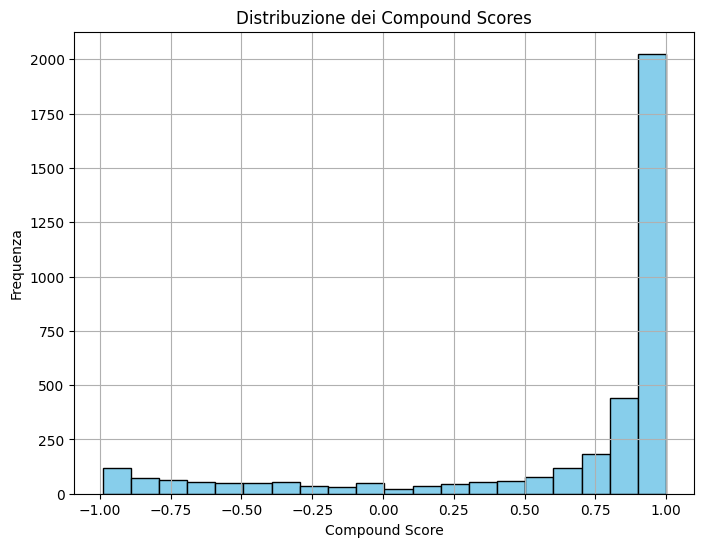

In [15]:
bar_restaurant_df_copy = bar_restaurant_df.copy()

bar_restaurant_df.loc[:, 'rounded_compound'] = bar_restaurant_df['compound'].round(2)

plt.figure(figsize=(8, 6))
plt.hist(bar_restaurant_df['rounded_compound'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Compound Score')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei Compound Scores')
plt.grid(True)
plt.show()

L'istogramma viene creato per visualizzare meglio la distribuzione degli score sotto la colonna compound.

In [17]:
bar_restaurant_df_copy = bar_restaurant_df.copy()

# definizione della funzione per assegnare un valore 0 o 1 a ogni utente in base al compound Score
def recommend_label(compound_score, threshold=0.75):
    if compound_score >= threshold:
        return 1
    else:
        return 0 

# applicazione della funzione per creare la colonna "will_recommend"
bar_restaurant_df.loc[:, 'will_recommend'] = bar_restaurant_df['compound'].apply(recommend_label)

bar_restaurant_df

,review,num_words,neg,neu,pos,compound,rounded_compound,will_recommend
0,Fantastic spot even quite cocktail swell host ...,23,0.000,0.522,0.478,0.9477,0.95,1
1,Love love love calamari 's good spicy endless ...,28,0.000,0.461,0.539,0.9766,0.98,1
2,Love place Stiff martinis cocktails cheap drin...,35,0.000,0.513,0.487,0.9766,0.98,1
3,'s everything great cocktail bar Great locatio...,37,0.000,0.748,0.252,0.9022,0.90,1
4,came pirates game around 5:30ish evening gotte...,71,0.024,0.568,0.408,0.9907,0.99,1
...,...,...,...,...,...,...,...,...
4313,Absolute worst show Las Vegas ... lenient guy ...,102,0.099,0.665,0.236,0.9231,0.92,1
4316,wife caught show Golden Nugget heard good thin...,125,0.035,0.698,0.267,0.9855,0.99,1
4317,dumbest show ever seen never laughed 15 minute...,64,0.198,0.663,0.139,-0.6868,-0.69,0
4319,restrooms looked like bombardment improvised s...,22,0.203,0.619,0.179,-0.1761,-0.18,0


Dopo aver visualizzato la distribuzione degli score di compound, è stata stabilita una soglia minima del compound pari al 75%. Questo significa che se il compound score di una recensione supera questa soglia, il cliente è considerato soddisfatto del servizio. È ragionevole ipotizzare che sopra questa soglia il cliente potrebbe essere incline a consigliare ai propri conoscenti di provare lo stesso bar o ristorante, poiché l'esperienza è stata positiva.

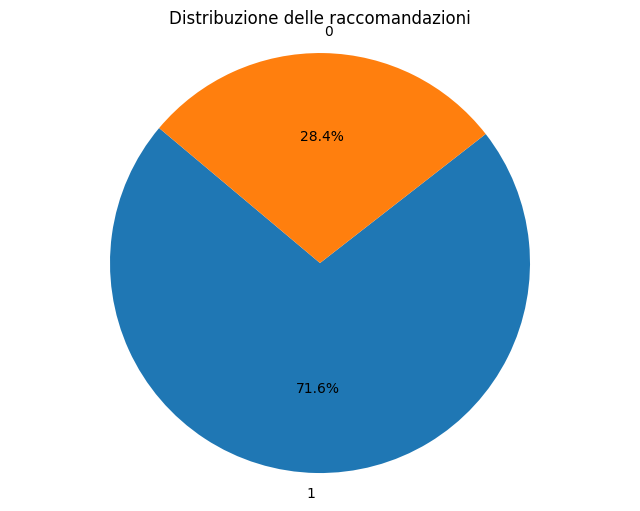

In [18]:
recommend_counts = bar_restaurant_df['will_recommend'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle raccomandazioni')
plt.axis('equal')
plt.show()

Attraverso questo plot possiamo osservare come poco più del 70% dei clienti è soddisfatto del servizio e probabilmente consiglierà ai propri conoscenti di provare quel servizi; mentre quasi il 30% probabilmente non lo consiglierà.

In [19]:
pipeline = Pipeline([
    ('preprocessor', TfidfVectorizer()),
    ('scaler', StandardScaler())
])

# divisione il dataset in due gruppi in base alla colonna "will_recommend", in questo caso si prendono solo gli utenti con valore sotto la colonna will_recommend uguale a 0
group2 = bar_restaurant_df[bar_restaurant_df['will_recommend'] == 0]

# creazione di un TfidfVectorizer per la trasformazione del testo
tfidf_vectorizer = TfidfVectorizer()

# trasformazione del testo delle recensioni del gruppo selezionato precedentemente in una matrice TF-IDF
tfidf_matrix_group2 = tfidf_vectorizer.fit_transform(group2['review'])

# si ottengono i nomi delle feature dal TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# calcolo dei punteggi TF-IDF medi per ciascuna feature su tutte le recensioni degli utenti che non consigliano il servizio
mean_tfidf_scores_group2 = np.mean(tfidf_matrix_group2, axis=0).A1

# si ottengono gli indici delle prime 3 parole con i punteggi TF-IDF medi più alti
top_indices_group2 = mean_tfidf_scores_group2.argsort()[::-1][:3]

# si ottengono le prime 3 parole con i punteggi TF-IDF medi più alti
top_words_group2 = [feature_names[idx] for idx in top_indices_group2]

print("Le 3 parole più utilizzate dai clienti che probabilmente non consiglieranno il servizio sono:")
print(top_words_group2)

Le 3 parole più utilizzate dai clienti che probabilmente non consiglieranno il servizio sono:
['place', 'food', 'service']


Le parole più utilizzate dagli utenti che non raccomanderanno il servizio sono "place", "food" e "service"; quindi è probabile che i clienti non siano molto soddisfatti su questi aspetti.